In [33]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# These test results are organized in such a way that when the number of mosquitos exceed 50, 
# they are split into another record (another row in the dataset), 
# such that the number of mosquitos are capped at 50. 

In [96]:
# Import Data

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [97]:
# Standardise column names

new_col_names = [x.lower() for x in list(train.columns)]
train.columns = new_col_names


In [102]:
# View Data info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [99]:
# train data manipulation

# train.rename(columns={'date': 'date_col'}, inplace=True)
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


<AxesSubplot:>

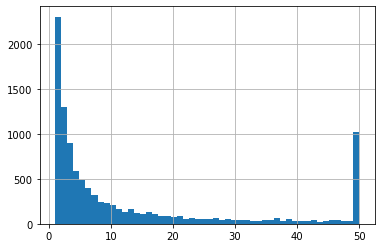

In [147]:
train['nummosquitos'].hist(bins=50)

In [122]:
print(sum(train['nummosquitos']==50))

1019


In [120]:
print(train.shape)
train.groupby(list(train.columns))[list(train.columns)].mean().shape

(10506, 12)


(9693, 6)

In [ ]:
8475+1019

In [148]:
col_w = list(train.columns)
col_w.remove('nummosquitos')
#col_w

In [159]:
df_t = train.groupby(col_w)['nummosquitos'].agg('sum')

df_t=pd.DataFrame(df_t)
df_t.reset_index(inplace=True)

In [162]:
print(train.sum())
print(df_t.sum())
df_t

date                      2007-05-292007-05-292007-05-292007-05-292007-0...
address                   4100 North Oak Park Avenue, Chicago, IL 60634,...
species                   CULEX PIPIENS/RESTUANSCULEX RESTUANSCULEX REST...
block                                                                374936
street                     N OAK PARK AVE N OAK PARK AVE N MANDELL AVE W...
trap                      T002T002T007T015T015T045T046T048T048T049T050T0...
addressnumberandstreet    4100  N OAK PARK AVE, Chicago, IL4100  N OAK P...
latitude                                                      439583.009378
longitude                                                    -921375.233272
addressaccuracy                                                       82152
nummosquitos                                                         135039
wnvpresent                                                              551
dtype: object
date                      2007-05-292007-05-292007-05-292007-05-292007-0..

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,wnvpresent,nummosquitos
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,1
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,2
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,0,1
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,0,1
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,0,6
8606,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,0,4
8607,2013-09-26,"South Vincennes Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,0,4
8608,2013-09-26,"University of Illinois at Chicago, 1100 South ...",CULEX PIPIENS/RESTUANS,11,S ASHLAND AVE,T090,"1100 S ASHLAND AVE, Chicago, IL",41.868077,-87.666901,9,0,2


In [150]:
8610+1019

9629

<AxesSubplot:>

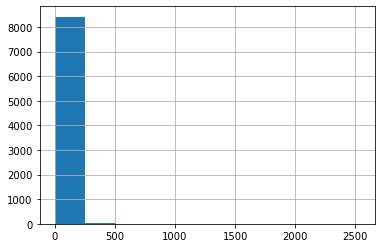

In [139]:
df_t['nummosquitos'].hist()
#.sort_values().values

In [115]:
train.sum()

date                      2007-05-292007-05-292007-05-292007-05-292007-0...
address                   4100 North Oak Park Avenue, Chicago, IL 60634,...
species                   CULEX PIPIENS/RESTUANSCULEX RESTUANSCULEX REST...
block                                                                374936
street                     N OAK PARK AVE N OAK PARK AVE N MANDELL AVE W...
trap                      T002T002T007T015T015T045T046T048T048T049T050T0...
addressnumberandstreet    4100  N OAK PARK AVE, Chicago, IL4100  N OAK P...
latitude                                                      439583.009378
longitude                                                    -921375.233272
addressaccuracy                                                       82152
nummosquitos                                                         135039
wnvpresent                                                              551
dtype: object

In [119]:
df_t.sum()

nummosquitos    135039
wnvpresent         551
dtype: int64

In [95]:
list(train.columns[:10])

['date_col',
 'address',
 'species',
 'block',
 'street',
 'trap',
 'addressnumberandstreet',
 'latitude',
 'longitude',
 'addressaccuracy']

C:\Users\User\AppData\Local\Temp/ipykernel_2608/1403201589.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_t = train.groupby(list(train.columns[:10]))['nummosquitos', 'wnvpresent'].agg('sum')


(8475, 12)

In [109]:
10506-sum(train['nummosquitos']==50)

9487

In [89]:
df_t['nummosquitos'].sort_values()

date_col    address                                             trap  species               
2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA         T048  CULEX PIPIENS/RESTUANS       1
2009-09-25  6300 West 64th Street, Chicago, IL 60638, USA       T155  CULEX PIPIENS                1
            6100 West Fullerton Avenue, Chicago, IL 60639, USA  T013  CULEX RESTUANS               1
            6000 West Montrose Avenue, Chicago, IL 60634, USA   T017  CULEX RESTUANS               1
2007-08-24  4200 West 127th Street, Alsip, IL 60803, USA        T135  CULEX RESTUANS               1
                                                                                                ... 
2007-09-05  South Doty Avenue, Chicago, IL, USA                 T115  CULEX PIPIENS             1648
2007-08-08  South Stony Island Avenue, Chicago, IL, USA         T138  CULEX PIPIENS             1658
2007-08-28  South Doty Avenue, Chicago, IL, USA                 T115  CULEX PIPIENS             220

In [65]:
#train['Date']<'2008'
plot_series(train.loc[train['date_col']<'2008',:].groupby('date_col')['NumMosquitos'], steps=10)


TypeError: 'NoneType' object is not iterable

<Figure size 1296x648 with 0 Axes>

In [ ]:
test

In [6]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [7]:
train['Date'].sort_values()

0        2007-05-29
24       2007-05-29
23       2007-05-29
22       2007-05-29
21       2007-05-29
            ...    
10439    2013-09-26
10438    2013-09-26
10437    2013-09-26
10446    2013-09-26
10505    2013-09-26
Name: Date, Length: 10506, dtype: object

min   2007-05-29
max   2013-09-26
Name: Date, dtype: datetime64[ns]

In [18]:
train['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

<AxesSubplot:>

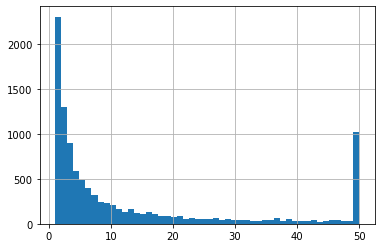

In [14]:
train.loc[train['WnvPresent']>0,:][10:20]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
842,2007-08-01,"2200 West 89th Street, Chicago, IL 60643, USA",CULEX PIPIENS,22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,15,1
902,2007-08-01,"University of Illinois at Chicago, 1100 South ...",CULEX PIPIENS/RESTUANS,11,S ASHLAND AVE,T090,"1100 S ASHLAND AVE, Chicago, IL",41.868077,-87.666901,9,17,1
917,2007-08-01,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS/RESTUANS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,50,1
919,2007-08-01,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,10,1
970,2007-08-01,"4500 North Campbell Avenue, Chicago, IL 60625,...",CULEX PIPIENS/RESTUANS,45,N CAMPBELL AVE,T220,"4500 N CAMPBELL AVE, Chicago, IL",41.963976,-87.691810,9,2,1
986,2007-08-01,"7000 North Moselle Avenue, Chicago, IL 60646, USA",CULEX PIPIENS,70,N MOSELL AVE,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,50,1
1047,2007-08-01,"3300 North Rutherford Avenue, Chicago, IL 6063...",CULEX PIPIENS,33,N RUTHERFORD AVE,T144,"3300 N RUTHERFORD AVE, Chicago, IL",41.940160,-87.794896,9,10,1
1078,2007-08-01,"Chicago Midway International Airport (MDW), 52...",CULEX PIPIENS/RESTUANS,52,W 63RD ST,T065,"5200 W 63RD ST, Chicago, IL",41.778297,-87.752411,9,28,1
1159,2007-08-01,"4000 South Dearborn Street, Chicago, IL 60609,...",CULEX PIPIENS/RESTUANS,40,S DEARBORN ST,T081,"4000 S DEARBORN ST, Chicago, IL",41.821582,-87.627796,9,13,1
1166,2007-08-01,"5000 South Union Avenue, Chicago, IL 60609, USA",CULEX PIPIENS/RESTUANS,50,S UNION AVE,T082,"5000 S UNION AVE, Chicago, IL",41.803423,-87.642984,8,3,1


In [15]:
# Mosquito information

# if different species, new row
# if more than 50 mosquitos, new row

In [27]:
# Proportion of WNV by species

train.groupby('Species')['WnvPresent'].agg(['mean', 'count'])

,mean,count
Species,,
CULEX ERRATICUS,0.000000,1
CULEX PIPIENS,0.088922,2699
CULEX PIPIENS/RESTUANS,0.055135,4752
CULEX RESTUANS,0.017883,2740
CULEX SALINARIUS,0.000000,86
CULEX TARSALIS,0.000000,6
CULEX TERRITANS,0.000000,222


In [141]:
2740+2699

5439

In [ ]:
# Change Data column to date time
test.set_index(pd.to_datetime(test['Date']), inplace=True)

test['Date'].agg(['min', 'max']) # date range